In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import helper

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lplh8duk because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


# Lesson 8: Dynamical Systems

## 1) Introduction to Dynamical Systems

In physics and many other natural sciences, various phenomena are described by what are called *dynamical systems*, which describe how systems may change with respect to time.  These can model things like the swinging of a clock pendulum, the path of a projectile in the air, or the [population of predators and prey](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) in an area.

One important thing to note is that dynamical systems are modeled by *differential equations*, in that we know how the function changes with respect to time, but we do not know the function itself.  We are therefore tasked with *integrating* the function to get a solution.

Here we will start with a simple example function that constantly grows at a rate of $3$ units per period of time, and starts with a value of $0$ at $t=0$.

Or more formally:

$$
\begin{eqnarray}
\frac{dx}{dt} = 3 \quad \Leftrightarrow \quad x^{\prime}(t) &=& 3  \\
x(0) &=& 0
\end{eqnarray}
$$

With careful inspection, it may be obvious to you what the solution to this equation should look like &mdash; but we will explore how to calculate this numerically.

Say we would like to see how the function looks from values $t=0$ to $t=5$.  We will break this up into a series of $n$ time steps and compute each value sequentially:

$$ x_i = x_{i-1} + x^\prime \Delta t $$

You can imagine this as taking small incremental steps at each time, with the direction of the step being given by the slope at that point.  This is called [*Euler's method*](https://en.wikipedia.org/wiki/Euler_method), and can be used with reasonable accuracy in simple equations.

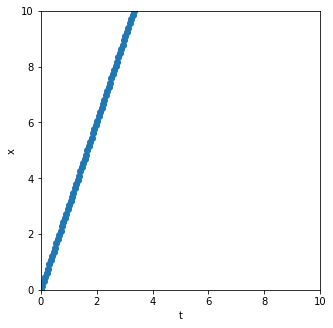

In [2]:
n = 100
t = np.linspace(0, 5, n)
x = np.zeros(n)
x[0] = 0 # Starting value

for i in range(1, n):
    dt = t[i] - t[i-1]
    dx = 3
    x[i] = x[i-1] + dx*dt

fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)
ax.plot(t, x,'o')
plt.xlabel("t")
plt.ylabel("x")
plt.xlim(0, 10)
plt.ylim(0, 10)
ax.set_aspect('equal')


As you may have expected, the above gives us a straight line with slope $3$ starting at the origin.  We can get an infinite number of solutions by varying this starting point.  Below is a plot of various solutions with different starting values as well as the slope at each point in space/time, this is called a *phase portrait* and we will examine some more interesting ones later.

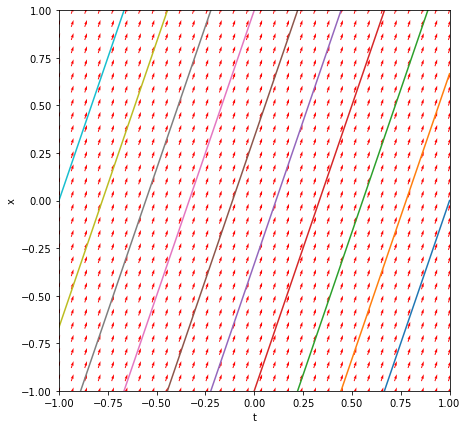

In [3]:
plt.figure(figsize=(7,7))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("t")
plt.ylabel("x")
helper.plot_vecfield_constant([-1, 1], [-1, 1], 30, dx)

x = np.linspace(-1, 1, 2)
for b in np.linspace(-3, 3, 10):
    plt.plot(x, x*3 + b)

Let's try a more interesting equation. Suppose the slope is related to the actual value of $x$ itself (remember that the independent variable is time $t$):

$$ 
\begin{eqnarray}
x^{\prime}(t) &=& -2 \,x(t) \\
x(0) &=& 1 
\end{eqnarray}
$$

Before you proceed, briefly **discuss what you think this will look like with your group**.  What sort of function has a derivative that is proportional to function itself?

We will use a helper function `helper.solve_ode` to integrate the function values, but it is essentially doing the same as what you have seen above.

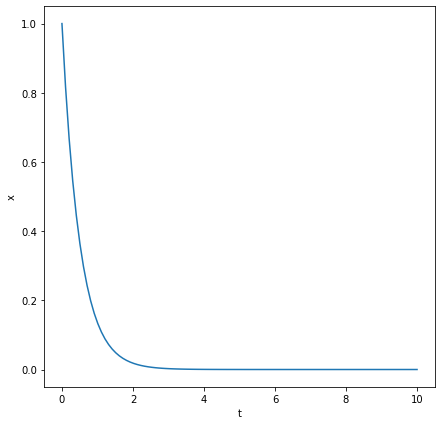

In [4]:
t = np.linspace(0, 10, 100)
x = helper.solve_ode(t, np.array([-2.0]), np.array([1.0]))[0]

plt.figure(figsize=(7,7))

plt.xlabel("t")
plt.ylabel("x")
plt.plot(t, x)

As you can see, this looks rather like an exponential function.  We can try to fit an exponential to the values to confirm this.

In [5]:
soln, residuals, rank, s = la.lstsq(t.reshape((len(t), 1)), np.log(x), rcond=None)
print(f'x = e^{soln[0]}t')
print('residual:', residuals[0])

x = e^-1.9999671364359206t
residual: 2.413698767852594e-28


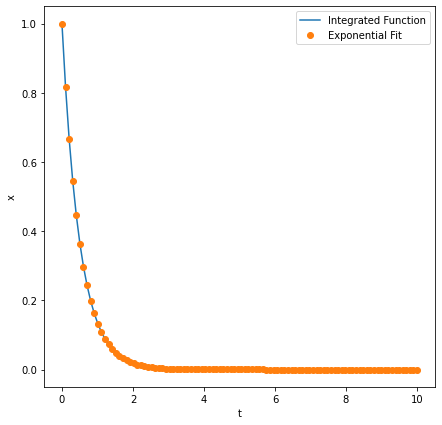

In [6]:
plt.figure(figsize=(7,7))
plt.xlabel("t")
plt.ylabel("x")
plt.plot(t, x, label="Integrated Function")
plt.plot(t, np.exp(t * soln[0]), 'o', label="Exponential Fit")
plt.legend()

Lets explore the phase portrait &mdash; this time we can see over time that solutions will converge to the same point $(0)$.

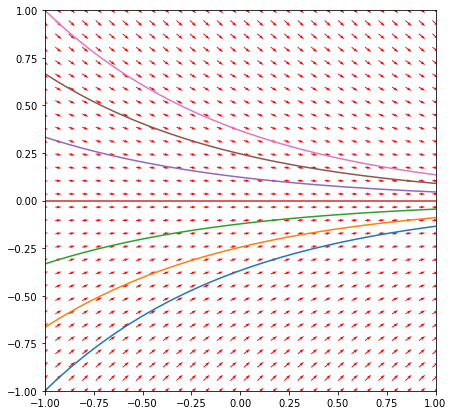

In [7]:
plt.figure(figsize=(7,7))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
helper.plot_vecfield_linear([-1, 1], [-1, 1], 30, -1)

x = np.linspace(-1, 1, 100)
for b in np.linspace(-1, 1, 7):
    y = helper.solve_ode(x, np.array([-1.0]), np.array([b]))[0]
    plt.plot(x, y)

## 2) Romeo and Juliet

> Every love affair has its ups and downs over time... so it can be modeled by differential equations.
>
> - S. Lewis and A. Dominguez <sup>[1]</sup>

We can model a love affair using the classic tale of Romeo and Juliet:

Let $R(t)$ be Romeo's feelings for Juliet at time $t$,
and $J(t)$ be Juliet's feelings for Romeo at time $t$.

$R,J > 0$ signify positive feelings of love and passion for each other while $R,J < 0$ signify mutual dislike and contempt.  $R=J=0$ mean that the two are completely indifferent towards one another.

Both Romeo's and Juliet's feelings can be represented with the following differential equations, where the love/contempt for one person can be influenced by both their own feelings and those of the other person:

$$
\begin{align*}
\frac{dR}{dt} &= aR + bJ\\
\frac{dJ}{dt} &= cR + dJ
\end{align*}
$$

where $a, b, c, d$ are constant values that we will explore. We can re-write this (unsurprisingly) in a matrix format:

$$ \begin{bmatrix} \frac{dR}{dt} \\ \frac{dJ}{dt} \end{bmatrix} = \begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}R \\ J\end{bmatrix}$$

And more compactly re-write as:

$$ {\bf x} = \begin{bmatrix} R \\ J \end{bmatrix} \quad {\bf x}^\prime = \begin{bmatrix} \frac{dR}{dt} \\ \frac{dJ}{dt} \end{bmatrix} \quad {\bf A} = \begin{bmatrix}a & b \\ c & d\end{bmatrix}$$

$$ {\bf x}^\prime = {\bf Ax} $$

### A)  Two Nerds

Lets take a look at the case when $b=c=-0.1$; the two lovers are oppositely influenced by each other's feelings:

$${\bf A} = \begin{bmatrix} 0 & -0.1 \\ -0.1 & 0 \end{bmatrix} \quad {\bf x}(0) = \begin{bmatrix}1 \\ -1\end{bmatrix}$$

We first create the time interval `t`, **which will be used in the rest of the notebook.**

In [1]:
start_time = 0
end_time = 30
time_steps = 100

t = np.linspace(start_time, end_time, time_steps)

NameError: name 'np' is not defined

**Check your answers:**

Write the matrix ${\bf A}$ as a 2d numpy array. Store it as the variable `A`.

In [9]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
A = np.array([[0,-.1],[-.1,0]])

Write the initial vector ${\bf x}(0)$ as a 1d **float** numpy array. Store it as the variable `x_0`.

In [10]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
x_0 = np.array([1.0,-1.0])

We will use our helper function to solve this ODE analytically. The `solve_ode()` function has the following signature:

```
def helper.solve_ode(t, A, x0):
    returns an array of shape (len(x0), len(t))
```

The position ${\bf x}$ as a function of time is stored as the variable `x`.

In [11]:
# Solving the ODE first using the helper function, for visualization purposes
x = helper.solve_ode(t, A, x_0)

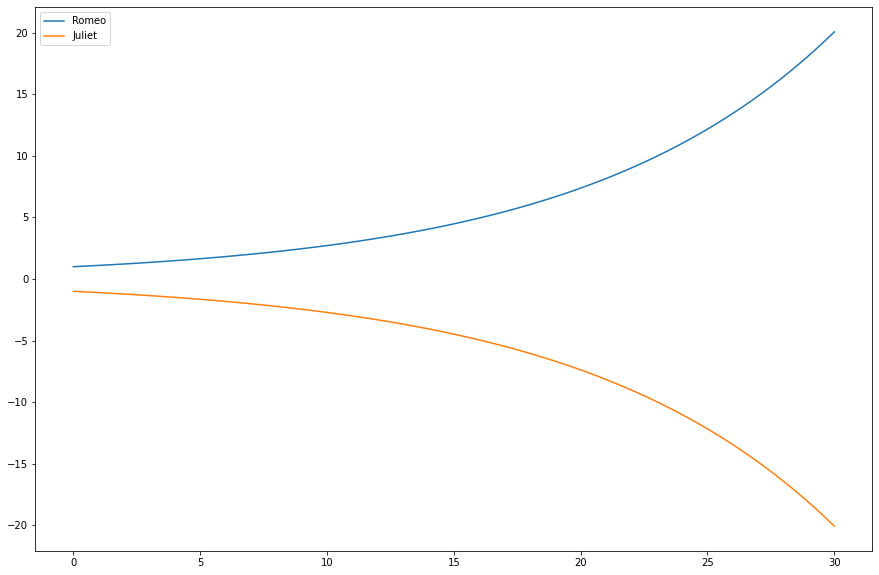

In [12]:
plt.figure(figsize=(15,10))
plt.plot(t, x[0], label='Romeo')
plt.plot(t, x[1], label='Juliet')
plt.legend()

Depending on their starting "moods", one will develop an intense love for the other while the other will develop a hatred.  **Try** changing the starting values to see what sort of plots you get.

For now, lets take a look at the eigenvalues and eigenvectors of the ${\bf A}$ matrix.

In [13]:
eigvals, eigvecs = la.eig(A)
print(eigvals)
print(eigvecs)

[ 0.1 -0.1]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


The exact solution to this set of differential equation is actually a linear combination of the eigenvectors.  The solution is given by:

$$
{\bf x}(t) = {\bf x_1}c_1e^{\lambda_1 t} + {\bf x_2}c_2e^{\lambda_2 t}
$$

where ${\bf x_1}$ and ${\bf x_2}$ are the eigenvectors.  Because we know the initial state ${\bf x}(0)$, we can solve for $c_1$, $c_2$:

$$
\begin{align*}{\bf x}(0) &= {\bf x_1}c_1 + {\bf x_2}c_2 \\
                           &= \begin{bmatrix} \vdots & \vdots \\ {\bf x_1} & {\bf x_2} \\ \vdots & \vdots\end{bmatrix} \begin{bmatrix}c_1 \\ c_2\end{bmatrix}\end{align*}
$$

**Check your answers:**

Use a matrix solve routine such as `numpy.linalg.solve()` to find the coefficients $c_1$ and $c_2$.  Save these as the aptly named `c1` and `c2`.
*Hint: To determine what arguments belong in the solve function here, notice that we are trying to solve an equation like $Mc = b$ where $c = \begin{bmatrix}c_1 \\ c_2\end{bmatrix}$. What are $M$ and $b$ in this case?*

In [14]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
sols = np.linalg.solve(eigvecs, x_0)
c1 = sols[0]
c2 = sols[1]

We can now print out `c1` and `c2` to look at their values:

In [15]:
print(c1, c2)

1.4142135623730951 0.0


Confirm that our exact solutions match our numerically calculated solutions:

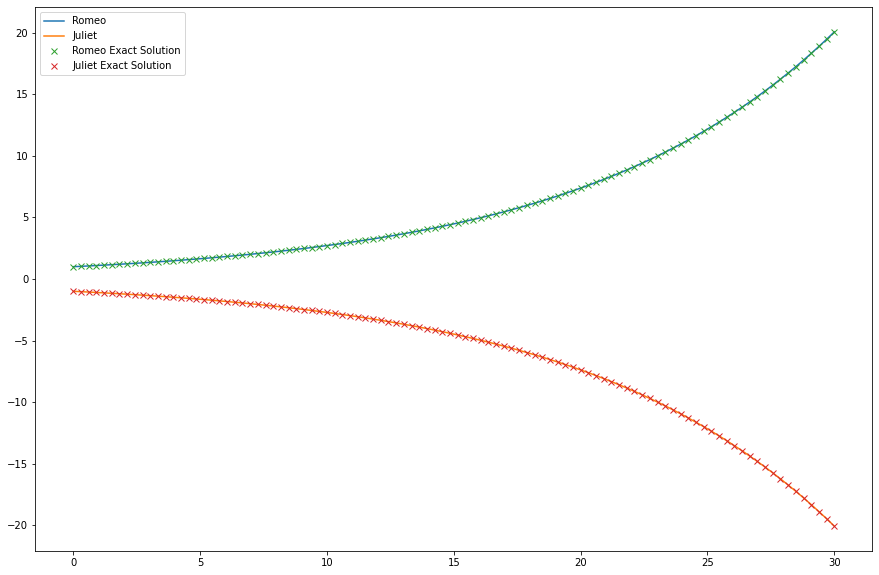

In [16]:
plt.figure(figsize=(15,10))
plt.plot(t, x[0], label='Romeo')
plt.plot(t, x[1], label='Juliet')
plt.plot(t, eigvecs[0,0] * c1 * np.exp(eigvals[0] * t), 'x', label='Romeo Exact Solution')
plt.plot(t, eigvecs[1,0] * c1 * np.exp(eigvals[0] * t), 'x', label='Juliet Exact Solution')
plt.legend()

So what do the eigenvectors and eigenvalues tell us?  We can find more information if we look at the phase plot with our eigenvectors overlaid.

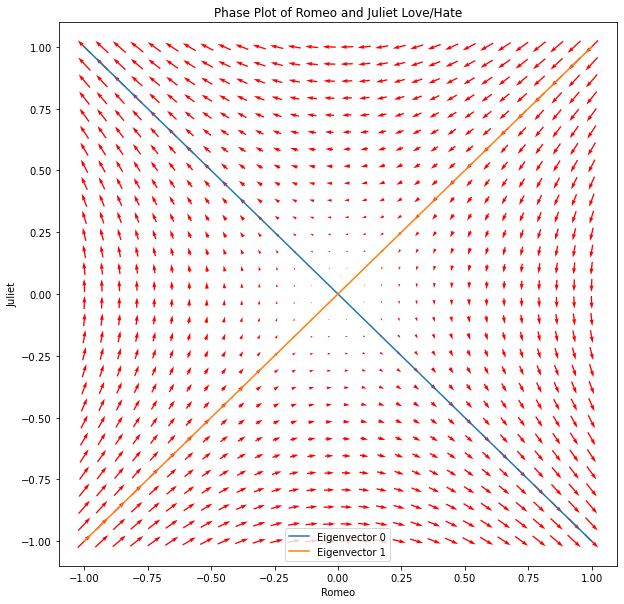

In [17]:
plt.figure(figsize=(10,10))
plt.title("Phase Plot of Romeo and Juliet Love/Hate")
plt.xlabel("Romeo")
plt.ylabel("Juliet")
helper.plot_vecfield([-1, 1], [-1, 1], 30, A)

helper.plot_vecspan(eigvecs[:,0], label='Eigenvector 0')
helper.plot_vecspan(eigvecs[:,1], label='Eigenvector 1')
plt.legend()

Having eigenvalues of opposite signs gives us what is called a "saddle point".  You can see that along one eigenvector the forces repel away from the origin (positive eigenvalue), while along the other it is attracted to the origin (negative eigenvalue).

### B) Circle of Love

Here is a model where one person mimics the other, while the other does the opposite:

$$ {\bf A} = \begin{bmatrix} 0 & 0.2 \\ -0.4 & 0 \end{bmatrix} \quad {\bf x}(0) = \begin{bmatrix}1 \\ -1\end{bmatrix} $$

**Check your answers:**

Write the matrix ${\bf A}$ above as a 2d numpy array. Store it as the variable `A_circle`.

In [18]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
A_circle = np.array([[0.0,0.2],[-0.4,0]])

Write the initial vector ${\bf x}(0)$ above as a 1d **float** numpy array. Store it as the variable `x_0_circle`.

In [19]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
x_0_circle = np.array([1.0,-1.0])

As before, let's jump in and take a look at the eigenvalue/eigenvector pairs:

In [20]:
eigvals_circle, eigvecs_circle = la.eig(A_circle)
print("Eigenvalues", eigvals_circle)
print("Eigenvector 1", eigvecs_circle[:,0])
print("Eigenvector 2", eigvecs_circle[:,1])

Eigenvalues [0.+0.28284271j 0.-0.28284271j]
Eigenvector 1 [0.        -0.57735027j 0.81649658+0.j        ]
Eigenvector 2 [0.        +0.57735027j 0.81649658-0.j        ]


Notice that here we have complex eigenvalues and eigenvectors. Suppose we try to solve for the exact solution:

$${\bf x}(t) = {\bf x_1}c_1e^{\lambda_1 t} + {\bf x_2}c_2e^{\lambda_2 t}$$

What do you think we will get?  Discuss briefly with your group before moving on. 

**Check your answers:**

Compute the solution ${\bf x}(t)$ given by the equation above, using the array `t` as a list of values of $t$ for which to compute the corresponding ${\bf x}$. 

*Hint: You need to create an array with `len(t)` columns where each column is the value of ${\bf x}(t)$ for the corresponding value of $t$ in the array `t`. One way to do this is by creating a NumPy array of zeroes of the required shape and then filling in each column in a `for` loop. Use the formula above to determine how to get ${\bf x}$ from $t$ in each column. Note that when you initially create the array, you will need to tell NumPy that it will contain complex numbers by specifying the `dtype` in the array creation function: for instance, instead of `np.zeros((len(x_0_circle), len(t)))`, you should write `np.zeros((len(x_0_circle), len(t)), dtype=np.complex128)`. Once you have your array created and are filling it, recall that the `np.exp` function will give you the exponent of a number or of every number in an array.*

*Hint: Recall what ${\bf x_1}$ and ${\bf x_2}$ represent.*

Store your solution as the 2d NumPy array `x_circle`, which should have shape `(len(x_0_circle), len(t))`.

In [26]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
# Define the variable x_circle
x_circle = np.zeros((len(x_0_circle), len(t)), dtype=np.complex128)
c_arr = np.linalg.solve(eigvecs_circle, x_0_circle)
x1 = eigvecs_circle[:,0]
x2 = eigvecs_circle[:,1]
cc1 = c_arr[0]
cc2 = c_arr[1]
for col_i in range(len(x_circle.T)):
    tval = t[col_i]
    e1 = np.exp(eigvals_circle[0]*tval)
    e2 = np.exp(eigvals_circle[1]*tval)
    x_t = (x1*cc1*e1)+(x2*cc2*e2)
    x_circle.T[col_i] = x_t

Compare your solution ${\bf x}$ with the analytical solution using the helper function:

In [23]:
xanalytical = helper.solve_ode(t, A_circle, x_0_circle)
print(xanalytical.shape)
print(x_circle.shape)

(2, 100)
(2, 100)


We will plot the real part of the solution ${\bf x}$.  Note that the value itself has no imaginary component (you can confirm this yourself), but it is complex because of the previous computations.

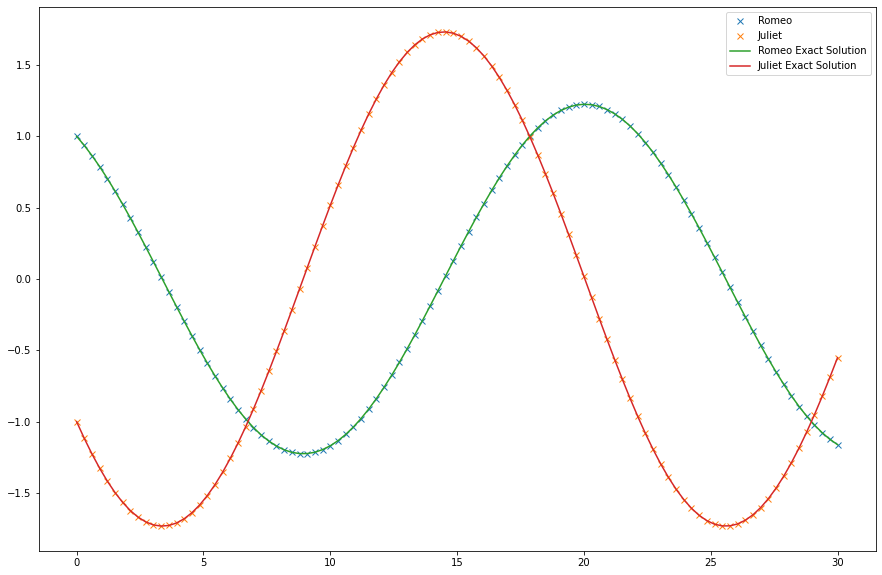

In [24]:
plt.figure(figsize=(15,10))
plt.plot(t, np.real(xanalytical)[0], 'x', label='Romeo')
plt.plot(t, np.real(xanalytical)[1], 'x', label='Juliet')
plt.plot(t, np.real(x_circle)[0], label='Romeo Exact Solution')
plt.plot(t, np.real(x_circle)[1], label='Juliet Exact Solution')
plt.legend()

If we plot the phase plot, we can confirm that the two lovers will have an endless "dance" with periods of love and contempt for one another.

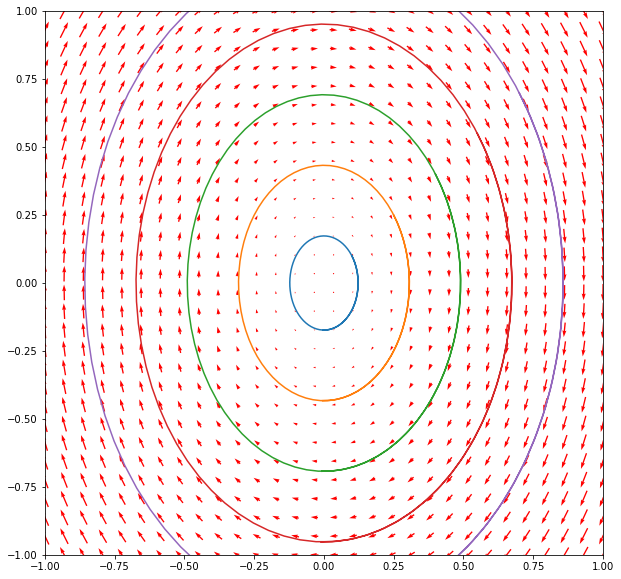

In [25]:
plt.figure(figsize=(10,10))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
helper.plot_vecfield([-1, 1], [-1, 1], 30, A_circle)

#t = np.linspace(0, 30, 60)
for i in np.linspace(0.1, 0.7, 5):
    x = helper.solve_ode(t, A_circle, np.array([i, i]))
    plt.plot(x[0], x[1])

### C) Two Lovers

Lets look at a model where each person copies the other's sentiments.

$$ {\bf A} = \begin{bmatrix} 0 & 0.1 \\ 0.2 & 0 \end{bmatrix} \quad {\bf x}(0) = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $$

**Check your answers:**

Write the matrix ${\bf A}$ as a 2d numpy array. Store it as the variable `A_lovers`.

In [31]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
A_lovers = np.array([[0,0.1],[0.2,0]])

Write the initial vector ${\bf x}(0)$ as a 1d **float** numpy array. Store it as the variable `x_0_lovers`.

In [32]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
x_0_lovers = np.array([1.0,2.0])

In [33]:
eigvals_lovers, eigvecs_lovers = la.eig(A_lovers)
print(eigvals_lovers)
print(eigvecs_lovers)

[ 0.14142136 -0.14142136]
[[ 0.57735027 -0.57735027]
 [ 0.81649658  0.81649658]]


**Check your answers:**

This time we have all real eigenvalues and eigenvectors, so we will not have a periodic solution. Again, solve for ${\bf x}$ as above and save your solution as `x_lovers`.

In [37]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 

x_lovers = np.zeros((len(x_0_lovers), len(t)))
c_lovers = np.linalg.solve(eigvecs_lovers, x_0_lovers)
x1 = eigvecs_lovers[:,0]
x2 = eigvecs_lovers[:,1]
cl1 = c_lovers[0]
cl2 = c_lovers[1]
for col_i in range(len(x_lovers.T)):
    tval = t[col_i]
    e1 = np.exp(eigvals_lovers[0]*tval)
    e2 = np.exp(eigvals_lovers[1]*tval)
    x_t = (x1*cl1*e1)+(x2*cl2*e2)
    x_lovers.T[col_i] = x_t

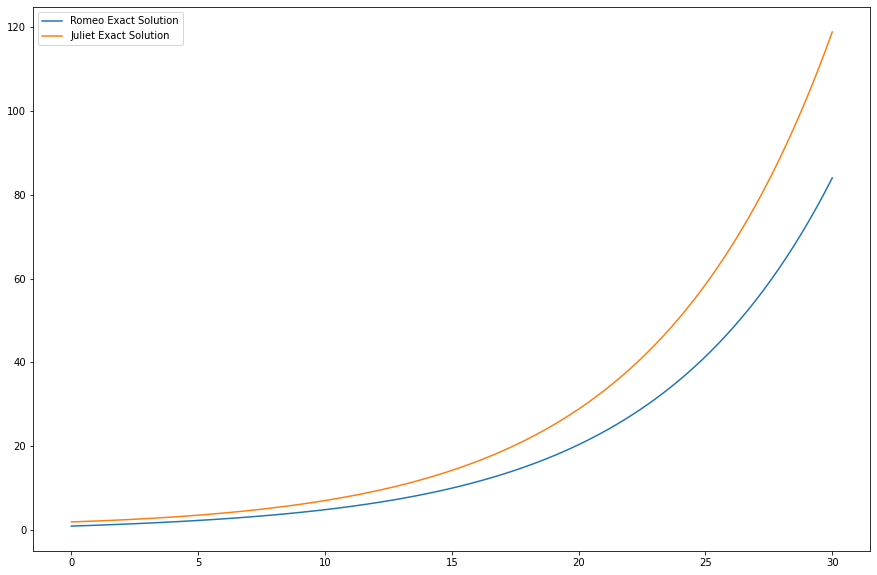

In [38]:
plt.figure(figsize=(15,10))
plt.plot(t, np.real(x_lovers)[0], label='Romeo Exact Solution')
plt.plot(t, np.real(x_lovers)[1], label='Juliet Exact Solution')
plt.legend()

Let's look at the phase plot one more time.  Now, depending on our starting position relative to eigenvectors 0 and 1, we will get different ending results.  If we start to the right of eigenvector 1, we will have positive results while if we start to the left we will get negative results.  Try changing the initial value of ${\bf x}(0)$ to see what sort of plots you get.

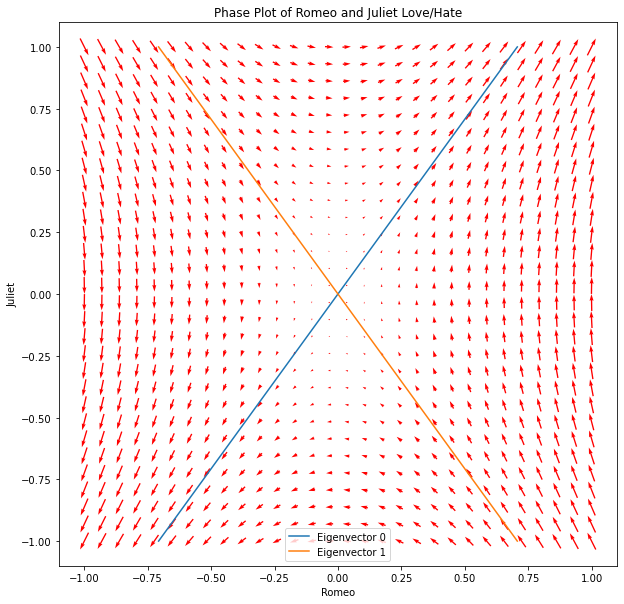

In [39]:
plt.figure(figsize=(10,10))
plt.title("Phase Plot of Romeo and Juliet Love/Hate")
plt.xlabel("Romeo")
plt.ylabel("Juliet")
helper.plot_vecfield([-1, 1], [-1, 1], 30, A_lovers)
helper.plot_vecspan(eigvecs_lovers[:,0], label='Eigenvector 0')
helper.plot_vecspan(eigvecs_lovers[:,1], label='Eigenvector 1')
plt.legend()

## References

1. Lewis, S., & Dominguez, A. (1997). Romeo and Juliet. Retrieved from https://mse.redwoods.edu/darnold/math55/DEproj/Sp97/AlicSara/juliet.pdf
2. Strogatz, S. (1994). Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering. Addison-Wesley.